In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanjacob03","key":"1b8ab587f0d6b7e7e08650d6e6708308"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d amanneo/diabetic-retinopathy-resized-arranged

 99% 1.20G/1.21G [00:21<00:00, 114MB/s]
100% 1.21G/1.21G [00:21<00:00, 61.6MB/s]


In [ ]:
! mkdir Data

In [ ]:
! unzip diabetic-retinopathy-resized-arranged.zip -d Data

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet101
import matplotlib.pyplot as plt
import shutil
import random
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
import cv2

In [ ]:
IMG_SIZE = 224

In [ ]:
root_path = '/content/kaggle/working/Data'
if os.path.exists(root_path):
    shutil.rmtree(root_path)

train_dir = os.makedirs(os.path.join(root_path, 'training'))
val_dir = os.makedirs(os.path.join(root_path, 'validation'))
class_names = ['0','1','2','3','4']

train_healthy = os.makedirs(os.path.join(root_path, 'training/0'))
train_mildDR = os.makedirs(os.path.join(root_path, 'training/1'))
train_moderateDR = os.makedirs(os.path.join(root_path, 'training/2'))
train_proliferateDR = os.makedirs(os.path.join(root_path, 'training/3'))
train_severeDR = os.makedirs(os.path.join(root_path, 'training/4'))

val_healthy = os.makedirs(os.path.join(root_path, 'validation/0'))
val_mildDR = os.makedirs(os.path.join(root_path, 'validation/1'))
valval_moderateDR = os.makedirs(os.path.join(root_path, 'validation/2'))
val_proliferateDR = os.makedirs(os.path.join(root_path, 'validation/3'))
val_severeDR = os.makedirs(os.path.join(root_path, 'validation/4'))

In [ ]:
source_path = '/content/Data'

In [ ]:
source_path_healthy = os.path.join(source_path, class_names[0])
source_path_mildDR = os.path.join(source_path, class_names[1])
source_path_moderateDR = os.path.join(source_path, class_names[2])
source_path_proliferateDR = os.path.join(source_path, class_names[3])
source_path_severeDR = os.path.join(source_path, class_names[4])

DR_class_count = [source_path_mildDR, source_path_moderateDR, source_path_proliferateDR, source_path_severeDR]

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_healthy))} images of 0.")
print(f"There are {len(os.listdir(source_path_mildDR))} images of 1.")
print(f"There are {len(os.listdir(source_path_moderateDR))} images of 2.")
print(f"There are {len(os.listdir(source_path_proliferateDR))} images of 3.")
print(f"There are {len(os.listdir(source_path_severeDR))} images of 4.")

There are 25810 images of 0.
There are 2443 images of 1.
There are 5292 images of 2.
There are 873 images of 3.
There are 708 images of 4.


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    all_files = []
    for fn in os.listdir(SOURCE_DIR):
        file_path = SOURCE_DIR + fn
        if os.path.getsize(file_path)>0:
            all_files.append(fn)
        else:
            print("\n" + fn + " is zero length, so ignoring.")
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]

    for file_name in train_set:
        #shutil.copyfile(SOURCE_DIR + file_name, TRAINING_DIR + file_name)
        img = cv2.imread(SOURCE_DIR + file_name)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        cv2.imwrite(TRAINING_DIR + file_name, img)

    for file_name in test_set:
        #shutil.copyfile(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)
        img = cv2.imread(SOURCE_DIR + file_name)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        cv2.imwrite(VALIDATION_DIR + file_name, img)

HEALTHY_SOURCE_DIR = "/content/Data/0/"
TRAINING_HEALTHY_DIR = "/content/kaggle/working/Data/training/0/"
VALIDATION_HEALTHY_DIR = "/content/kaggle/working/Data/validation/0/"

MILDDR_SOURCE_DIR = "/content/Data/1/"
TRAINING_MILDDR_DIR = "/content/kaggle/working/Data/training/1/"
VALIDATION_MILDDR_DIR = "/content/kaggle/working/Data/validation/1/"

MODERATEDR_SOURCE_DIR = "/content/Data/2/"
TRAINING_MODERATEDR_DIR = "/content/kaggle/working/Data/training/2/"
VALIDATION_MODERATEDR_DIR = "/content/kaggle/working/Data/validation/2/"

PROLIFERATEDR_SOURCE_DIR = "/content/Data/3/"
TRAINING_PROLIFERATEDR_DIR = "/content/kaggle/working/Data/training/3/"
VALIDATION_PROLIFERATEDR_DIR = "/content/kaggle/working/Data/validation/3/"

SEVEREDR_SOURCE_DIR = "/content/Data/4/"
TRAINING_SEVEREDR_DIR = "/content/kaggle/working/Data/training/4/"
VALIDATION_SEVEREDR_DIR = "/content/kaggle/working/Data/validation/4/"

split_size = .85
split_data(HEALTHY_SOURCE_DIR, TRAINING_HEALTHY_DIR, VALIDATION_HEALTHY_DIR, split_size)
split_data(MILDDR_SOURCE_DIR, TRAINING_MILDDR_DIR, VALIDATION_MILDDR_DIR, split_size)
split_data(MODERATEDR_SOURCE_DIR, TRAINING_MODERATEDR_DIR, VALIDATION_MODERATEDR_DIR, split_size)
split_data(PROLIFERATEDR_SOURCE_DIR, TRAINING_PROLIFERATEDR_DIR, VALIDATION_PROLIFERATEDR_DIR, split_size)
split_data(SEVEREDR_SOURCE_DIR, TRAINING_SEVEREDR_DIR, VALIDATION_SEVEREDR_DIR, split_size)

In [ ]:
TRAINING_DIR = '/content/kaggle/working/Data/training'
VALIDATION_DIR = '/content/kaggle/working/Data/validation'
healthy_imgs = len(os.listdir('/content/kaggle/working/Data/training/0')) + len(os.listdir('/content/kaggle/working/Data/validation/0'))
dr_imgs = len(os.listdir('/content/kaggle/working/Data/training/3')) + len(os.listdir('/content/kaggle/working/Data/validation/3'))
healthy_imgs, dr_imgs

(25810, 873)

In [ ]:
def preprocessing_fn(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = cv2.addWeighted(image,3.1, cv2.GaussianBlur(image, (15,15) ,IMG_SIZE/10),-3.5 ,128)
    adjusted = cv2.convertScaleAbs(image, alpha=1.8, beta=1.5)
    adjusted = cv2.resize(adjusted, (IMG_SIZE, IMG_SIZE))
    return adjusted.astype('float64')

In [ ]:
img_list_1 = [name for name in os.listdir(TRAINING_MILDDR_DIR)]
lim = len(img_list_1)
left_img_list_1 = [name for name in img_list_1 if 'left' in name]
right_img_list_1 = [name for name in img_list_1 if 'right' in name]

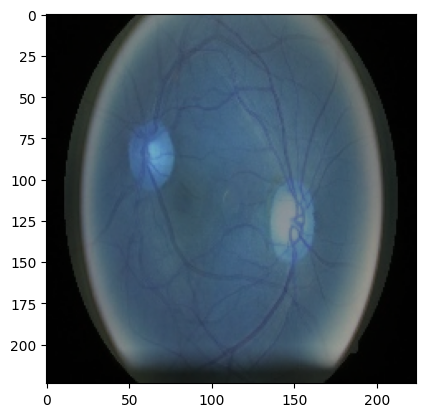

In [ ]:
def merge_fn(DIR, img_list2, img):
    l = len(img_list2)
    index = random.randint(0,l-1)
    img2 = cv2.imread(DIR + img_list2[index])
    img2 = cv2.addWeighted(img, 0.5, img2, 0.5, 1)
    return img2

img = cv2.imread(TRAINING_MILDDR_DIR + left_img_list_1[5])
test = merge_fn(TRAINING_MILDDR_DIR, left_img_list_1, img)
plt.imshow(test)

In [ ]:
def oversampling(DIR,n):
    img_list = [name for name in os.listdir(DIR)]
    lim = len(img_list)
    left_img_list = [name for name in img_list if 'left' in name]
    right_img_list = [name for name in img_list if 'right' in name]

    for i in range(n):
        index = random.randint(0,lim-1)
        fn = img_list[index]
        file_path = DIR + fn

        if os.path.getsize(file_path)>0:
            img = cv2.imread(file_path)
            r = random.randint(0,2)

            if r==0:
                flip = cv2.flip(img,0)
                cv2.imwrite(file_path+str(i)+'.jpeg',flip)
            elif r==1:
                if 'left' in fn:
                    merge = merge_fn(DIR, left_img_list, img)
                else:
                    merge = merge_fn(DIR, right_img_list, img)
                cv2.imwrite(file_path+str(i)+'.jpeg',merge)
            else:
                cv2.imwrite(file_path+str(i)+'.jpeg',img)

len_healthy = len(os.listdir(TRAINING_HEALTHY_DIR))
len_dr = len(os.listdir(TRAINING_MILDDR_DIR))
oversampling(TRAINING_MILDDR_DIR, len_healthy - len_dr)

len_dr = len(os.listdir(TRAINING_MODERATEDR_DIR))
oversampling(TRAINING_MODERATEDR_DIR, len_healthy - len_dr)

len_dr = len(os.listdir(TRAINING_PROLIFERATEDR_DIR))
oversampling(TRAINING_PROLIFERATEDR_DIR, len_healthy - len_dr)

len_dr = len(os.listdir(TRAINING_SEVEREDR_DIR))
oversampling(TRAINING_SEVEREDR_DIR, len_healthy - len_dr)

In [ ]:
def validation_oversampler(DIR, n):
    img_list = [name for name in os.listdir(DIR)]
    lim = len(img_list)
    left_img_list = [name for name in img_list if 'left' in name]
    right_img_list = [name for name in img_list if 'right' in name]
    for i in range(n):
        index = random.randint(0,lim-1)
        fn = img_list[index]
        file_path = DIR + fn

        if os.path.getsize(file_path)>0:
            img = cv2.imread(file_path)
            r = random.randint(0,2)

            if r==0:
                flip = cv2.flip(img,0)
                cv2.imwrite(file_path+str(i)+'.jpeg',flip)
            else:
                cv2.imwrite(file_path+str(i)+'.jpeg',img)

len_healthy = len(os.listdir(VALIDATION_HEALTHY_DIR))

len_dr = len(os.listdir(VALIDATION_MILDDR_DIR))
validation_oversampler(VALIDATION_MILDDR_DIR, len_healthy - len_dr)

len_dr = len(os.listdir(VALIDATION_MODERATEDR_DIR))
oversampling(VALIDATION_MODERATEDR_DIR, len_healthy - len_dr)

len_dr = len(os.listdir(VALIDATION_PROLIFERATEDR_DIR))
oversampling(VALIDATION_PROLIFERATEDR_DIR, len_healthy - len_dr)

len_dr = len(os.listdir(VALIDATION_SEVEREDR_DIR))
oversampling(VALIDATION_SEVEREDR_DIR, len_healthy - len_dr)

In [ ]:
len(os.listdir(TRAINING_MODERATEDR_DIR)), len(os.listdir(TRAINING_SEVEREDR_DIR))

(21938, 21938)

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       horizontal_flip=True,
                                      preprocessing_function=preprocessing_fn)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        target_size=(IMG_SIZE, IMG_SIZE))

    validation_datagen = ImageDataGenerator(rescale=1./255,
                                            horizontal_flip=True,
                                            preprocessing_function=preprocessing_fn)
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(IMG_SIZE, IMG_SIZE))

    return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 109690 images belonging to 5 classes.
Found 19360 images belonging to 5 classes.


In [ ]:
img_input = keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE,1))
modelRes = keras.applications.ResNet152V2(
    weights = 'imagenet',
    include_top = False,
    input_shape = (IMG_SIZE, IMG_SIZE, 3)
)
modelRes.trainable = False

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
final_model = keras.models.Sequential([
    keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    modelRes,
    keras.layers.GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')]
)
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 59447045 (226.77 MB)
Trainable params: 1115397 (4.25 MB)
Non-trainable params: 58331648 (222.52 MB)
________

In [ ]:
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
rlronp = keras.callbacks.ReduceLROnPlateau(monitor="loss",
                                            factor=0.1,
                                            patience=2,
                                            verbose=1)
earlyStop = keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0.005,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=10
)

filepath = '/content'
besty = keras.callbacks.ModelCheckpoint(
    filepath,
    monitor = "val_loss",
    verbose = 0,
    save_best_only = True,
    mode = "auto",
    save_freq = "epoch",
)

callbacks = [besty]

In [ ]:
history2 = final_model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/20
1714/1714 [==============================] - 930s 532ms/step - loss: 1.2150 - accuracy: 0.4848 - val_loss: 1.2960 - val_accuracy: 0.4323
Epoch 2/20
1714/1714 [==============================] - 860s 502ms/step - loss: 1.0468 - accuracy: 0.5507 - val_loss: 1.4121 - val_accuracy: 0.4284
Epoch 3/20
1714/1714 [==============================] - 869s 507ms/step - loss: 0.9669 - accuracy: 0.5891 - val_loss: 1.4108 - val_accuracy: 0.4467
Epoch 4/20
1714/1714 [==============================] - 862s 503ms/step - loss: 0.9082 - accuracy: 0.6129 - val_loss: 1.5182 - val_accuracy: 0.4332
Epoch 5/20
1714/1714 [==============================] - 860s 502ms/step - loss: 0.8696 - accuracy: 0.6299 - val_loss: 1.4513 - val_accuracy: 0.4540
Epoch 6/20
1714/1714 [==============================] - 860s 502ms/step - loss: 0.8318 - accuracy: 0.6447 - val_loss: 1.4166 - val_accuracy: 0.4564
Epoch 7/20
1714/1714 [==============================] - 861s 502ms/step - loss: 0.8033 - accuracy: 0.6594 - val_

In [ ]:
files.download('fingerprint.pb')
files.download('saved_model.pb')
files.download('keras_metadata.pb')
files.download('variables/variables.data-00000-of-00001')
files.download('variables/variables.index')